# Assignment 1
yg833

This was lab # 10 which was started in class as an example that we finish for homework this week. 

In [1]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Asc.csv', header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [3]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
df.sort_values(by='x', inplace=True)

In [5]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


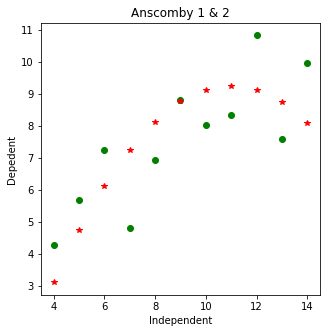

In [6]:
pl.figure(figsize=(5,5))
pl.plot(df['x'], df['y1'], 'go')
pl.plot(df['x'], df['y2'], 'r*')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 & 2');

# First Anscomby distribution: y1

## OLS linear fit  y1~x

In [7]:
ols1 = smf.ols(formula='y1  ~ x', data=df).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Fri, 30 Nov 2018   Prob (F-statistic):            0.00217
Time:                        10:31:46   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


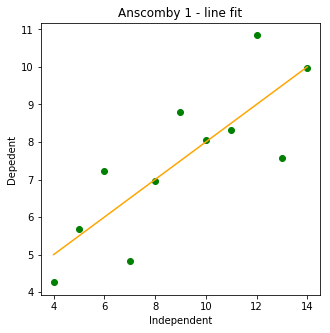

In [9]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], ols1.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - line fit');

## OLS quadratic fit  y1~x^2 + x

In [11]:
# create a new feature for x^2
df['x2'] = df['x']**2

In [12]:
ols2 = smf.ols(formula='y1 ~ x2 + x',data=df).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Fri, 30 Nov 2018   Prob (F-statistic):            0.00956
Time:                        10:32:21   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.8

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


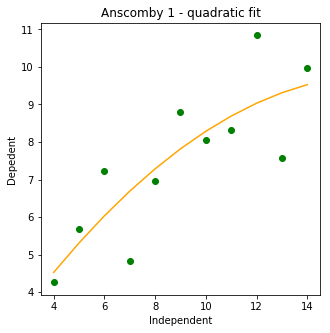

In [14]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], ols2.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - quadratic fit');

# Do it yourself as homework:
    1 write down in words what this result means
    2 do the same for the other series of data (y2)
    3 use the value of the likelihood which you can find in the models summary and the formula for the likelihood ration in the slides to derive the same result: 
    
    you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value


# 1. Compare the models with the LR ratio test

In [15]:
# OLS2.compare_lr_test?
# from the statsmodels.formula.api docstring, it reads that the likelihood ratio test is to test whether the restricted model is correct
# restricted : Result instance
#    The restricted model is assumed to be nested in the current model.
#    The result instance of the restricted model is required to have two
#    attributes, residual sum of squares, `ssr`, residual degrees of
#    freedom, `df_resid`.
# and it returns the chisquare distributed with df_diff degrees of freedom
# see reference from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.compare_lr_test.html

a = 0.05
# setting alpha to 0.05 if more than 0.05 then cannot reject the null hypothesis

### Null  Hypothesis:
The less complex model is better than the more complex one. 

In [16]:
res1 = ols2.compare_lr_test(ols1)

print(res1)

(0.70794919019374447, 0.40012547285804223, 1.0)


In [17]:
if res1[1] > a:
    print(res1[1], 'is greater than alpha (0.05), therefore fail to reject the NULL hypothesis and the less complex model is better.')
else:
    print(res1[1], 'is less than alpha (0.05), therefore reject the NULL hypothsis and go with the more complex model.')

0.400125472858 is greater than alpha (0.05), therefore fail to reject the NULL hypothesis and the less complex model is better.


# 2. Second Anscomby distribution: y2

## OLS linear fit  y2~x

In [18]:
ols3 = smf.ols(formula='y2  ~ x', data=df).fit()
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 30 Nov 2018   Prob (F-statistic):            0.00218
Time:                        10:32:53   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


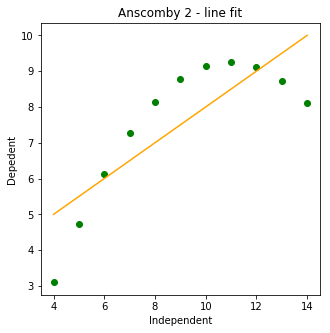

In [19]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y2'],'go')
pl.plot(df['x'], ols3.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 2 - line fit');

## OLS quadratic fit  y2~x^2 + x

In [20]:
ols4 = smf.ols(formula='y2 ~ x2 + x',data=df).fit()
print(ols4.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Fri, 30 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        10:33:10   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


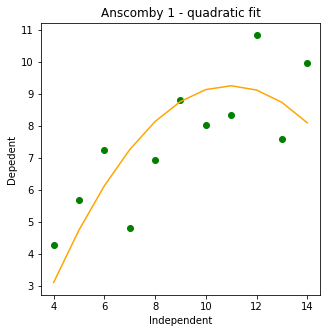

In [21]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], ols4.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - quadratic fit');

In [22]:
res2 = ols4.compare_lr_test(ols3) 
print(res2)

(146.63437980392047, 9.4331834208378821e-34, 1.0)


In [23]:
if res2[1] > a:
    print(res2[1], 'is greater than alpha (0.05), therefore fail to reject the NULL hypothesis and the less complex model is better.')
else:
    print(res2[1], 'is less than alpha (0.05), therefore reject the NULL hypothsis and go with the more complex model.')

9.43318342084e-34 is less than alpha (0.05), therefore reject the NULL hypothsis and go with the more complex model.


 # 3. use the value of the likelihood which you can find in the models summary and the formula for the likelihood ration in the slides to derive the same result: 

you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value

# chi sq table for your convenience

![chi sq table](chisq.gif)

### LR Equation from UInotebook slides from Dr. Bianco

https://github.com/fedhere/UInotebooks/blob/master/slides2018/UI9_PUI2018.pdf


\begin{equation*}
LR = -2 \mathbf{log}_e \frac{L(model 1)}{L (model 2)}
\end{equation*}

Equation of LR:
    
    LR = -2 log (Likelihood_restricted / likelihood_complex)
    
or equivalently

    LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

where log is the natural log (base e)

In [26]:
print(ols3.llf)

-16.8461197199


In [27]:
print(ols4.llf)

56.471070182


In [29]:
# calc the LR using the likelihood from models summary and the formula then compared to chi sq

lr = (-2) * (ols3.llf - ols4.llf)

print(lr)

146.634379804


In [30]:
print(lr, 'is the same as', res2[0])

146.634379804 is the same as 146.634379804
